In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
import pickle
from scipy.signal import convolve
import matplotlib.image as image
import sys
import matplotlib.colors as colors
import matplotlib.cm as cmx
import os

In [13]:
home = os.path.expanduser("~")
sys.path.insert(1, f'{home}/Documents/Repositories/motion_anticipation_network/model')
from utils import  DOG

In [3]:
speeds = np.asarray([0.1,0.2,0.3,0.4,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9])
speeds = speeds[::2]

In [4]:

def bar(t, xc, b = 0.160, v = 1):

    if xc >=-b+v*t and xc <=b+v*t :
        return 1
    else: 
        return 0

# load RAM simulations

In [6]:
data = {}
cell = 50


nets_list = ['fb_linear/wBA/wBA_0.0',
             'fb_linear/wBA/wBA_10.0' ]


for net in nets_list:
    
    data[net] = {}

    bars = []
    tps_rf_GC_mid = []
    times = []

    Fs = []
    RBs = []
    RAs = []
    RGs = []
    VGs = []

    peaks_RG = []
    peaks_RB = []
    peaks_drive = []

    amps_RB = []
    amps_RA = []
    amps_RG = []
    amps_drive = []

    ants_RB_drive = []
    ants_RB_bar = []

    ants_RG_drive = []
    ants_RG_bar = []
    ants_drive = []

    for s in speeds: 
        fp = f'{home}/Documents/Simulations/motion_anticipation_network/{net}/smooth_{s}'
        with open(f'{fp}/out_smooth', 'rb') as handle:
            out = pickle.load(handle)    
            
        with open(f'{fp}/params', 'rb') as handle:
            paramsi = pickle.load(handle)
            
        duration = paramsi['duration']
        dt = paramsi['dt']
        time = np.arange(0,duration,dt) #- (paramsi['spacing']*cell)/paramsi['speed']#*1000#+45
        mid_cell = int( paramsi['nb_GC_cells']/2 )
        pos_cell = paramsi['pos_rf_GC_mid'][mid_cell]
        barr = [bar(t,pos_cell, v = s) for t in time]
        tp_bar = paramsi['tps_rf_GC_mid'][mid_cell]

        peak_RB = time[np.argmax(out['RB'][50,:])]
        peak_RG = time[np.argmax(out['RG'][:])]
        peak_drive = time[np.argmax(out['F'][:])]

        amp_RB = np.max(out['RB'][50,:])
        amp_RA = np.max(out['RA'][50,:])
        amp_RG = np.max(out['RG'][:])
        amp_drive = np.max(out['F'][:])

        


        # RAM
        ant_RB_drive =  peak_drive - peak_RB
        ant_RB_bar  =  tp_bar - peak_RB

        ant_RG_drive =  peak_drive - peak_RG
        ant_RG_bar =  tp_bar - peak_RG
    
        ant_drive =  tp_bar - peak_drive

        bars.append(barr)
        tps_rf_GC_mid.append(tp_bar)
        times.append(time)

        Fs.append(out['F'])
        RBs.append(out['RB'][50,:])
        RAs.append(out['RA'][50,:])
        VGs.append(out['VG'])
        RGs.append(out['RG'])

        peaks_RB.append(peak_RB)
        peaks_RG.append(peak_RG)
        peaks_drive.append(peak_drive)

        amps_RB.append(amp_RB)
        amps_RA.append(amp_RA)
        amps_RG.append(amp_RG)
        amps_drive.append(amp_drive)

        ants_RB_drive.append(ant_RB_drive)
        ants_RB_bar.append(ant_RB_bar)
        
        ants_RG_drive.append(ant_RG_drive)
        ants_RG_bar.append(ant_RG_bar)
        ants_drive.append(ant_drive)


    
    data[net]['peaks']={}
    data[net]['peaks']['RB'] = np.asarray(peaks_RB)
    data[net]['peaks']['RG'] = np.asarray(peaks_RG)
    data[net]['peaks']['drive'] =np.asarray( peaks_drive)  

    data[net]['amps']={}
    data[net]['amps']['RB'] = np.asarray(amps_RB)
    data[net]['amps']['RA'] = np.asarray(amps_RA)
    data[net]['amps']['RG'] = np.asarray(amps_RG)
    data[net]['amps']['VG'] = np.asarray(amps_RG)
    data[net]['amps']['drive'] =np.asarray( amps_drive)

    data[net]['ants'] ={}
    data[net]['ants']['RB_drive'] =np.asarray(ants_RB_drive)
    data[net]['ants']['RB_bar'] =np.asarray(ants_RB_bar)
    data[net]['ants']['RG_drive'] =np.asarray(ants_RG_drive)
    data[net]['ants']['RG_bar'] =np.asarray(ants_RG_bar)
    data[net]['ants']['drive'] =np.asarray(ants_drive)
    
    data[net]['RB'] = RBs
    data[net]['RA'] = RAs
    data[net]['RG'] = RGs
    data[net]['VG'] = VGs
    data[net]['F'] = Fs


    data['bars'] = bars
    data['tps_rf_mid'] = np.asarray(tps_rf_GC_mid)
    data['times'] = times


In [7]:
net = nets_list[1]
net_pool = nets_list[0]

# Figure Parameter

In [8]:
fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 4
ms = 60

figsize_ratio = 3

figsize = (8,8)
image_format = "png"
dpi = 300
panellabel_position = [-0.07, .85]


# anticipation mechanism RAM

In [9]:
%matplotlib inline

[-19.5, -19.0, -18.5, -18.0, -17.5, -17.0, -16.499999999999996, -16.0, -15.5, -15.0, -14.500000000000002, -14.000000000000002, -13.5, -13.0, -12.5, -12.0, -11.5, -10.999999999999998, -10.500000000000002, -10.0, -9.5, -9.0, -8.5, -7.999999999999999, -7.499999999999998, -7.000000000000001, -6.5, -6.0, -5.499999999999999, -4.999999999999999, -4.499999999999998, -4.000000000000001, -3.5000000000000004, -3.0, -2.4999999999999996, -1.9999999999999991, -1.4999999999999987, -1.0000000000000009, -0.5000000000000004, 0.0, 0.5000000000000004, 1.0000000000000009, 1.5000000000000013, 2.0000000000000018, 2.500000000000002, 3.0000000000000027, 3.500000000000003, 3.9999999999999982, 4.499999999999998, 4.999999999999999, 5.499999999999999, 6.0, 6.5, 7.000000000000001, 7.500000000000001, 8.000000000000002, 8.500000000000002, 9.000000000000002, 9.500000000000004, 10.000000000000004, 10.499999999999998, 10.999999999999998, 11.5, 12.0, 12.5, 13.0, 13.5, 14.000000000000002, 14.500000000000002, 15.0000000000

<>:122: SyntaxWarning: invalid escape sequence '\m'
<>:122: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_16373/1607772730.py:122: SyntaxWarning: invalid escape sequence '\m'
  cax=cbar_ax, orientation='horizontal', label='position [$\mu m$]')


Text(0.5, 0, 'time [s]')

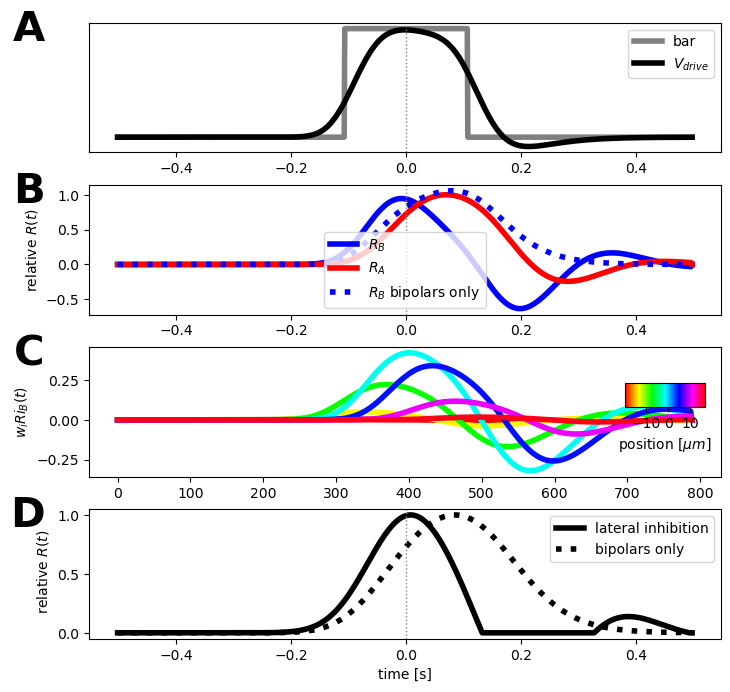

In [10]:
cbar = 'grey'
c1 = 'blue'
c2 = 'red'
speed_plot = -3

#initialize figure
nrows = 4
ncols = 1

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)



fig.subplots_adjust(top=0.88,
bottom=0.11,
left=0.11,
right=0.9,
hspace=0.25,
wspace=0.48)





ax = fig.add_subplot(gs[0])

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "A", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')



time = data['times'][speed_plot]
barr = [bar(t,pos_cell, v = speeds[speed_plot]) for t in time]

xdata = time  - pos_cell/speeds[speed_plot]
ax.plot(xdata ,barr, linewidth = lw, color = cbar, label = 'bar')
ax.plot(xdata,data[net]['F'][speed_plot]/np.max(data[net]['F'][-1]), label = '$V_{drive}$', color = 'k', linewidth = lw)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
#ax.set_ylabel('$V(t)')
ax.legend()
ax.set_yticks([])


ax = fig.add_subplot(gs[1])


ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')



RB =data[net]['RB'][speed_plot]
RA =data[net]['RA'][speed_plot]   

ax.plot(xdata,RB/np.max(data[net]['RB'][-1]), color = c1, linewidth = lw, label = '$R_{B}$')
#ax.plot(xdata,RB, color = c1, linewidth = lw)

ax.plot(xdata,RA/np.max(data[net]['RA'][-1]), color = c2, linewidth = lw, label = '$R_{A}$')
#ax.plot(xdata,RA, color = c2, linewidth = lw)

ax.plot(xdata,data[net_pool]['RB'][speed_plot]/np.max(data[net_pool]['RB'][-1]), label = '$R_{B}$ bipolars only', color = c1, linestyle = ':', linewidth = lw)
#ax.plot(xdata,data[net_pool]['RB'][speed_plot], label = f'RB without lateral connectivity', color = c1, linestyle = ':', linewidth = lw)

ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('relative $R(t)$')
ax.legend()


# add panel with all BC responses that the GC pools over
ax = fig.add_subplot(gs[2])


ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "C", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')

# get BC cells that the GC pools from 
rf = DOG(paramsi['pos_rf_mid'],paramsi['pos_rf_mid'][cell],paramsi['std_GC'], paramsi['std_GC_s'], paramsi['w_GC'])
#rf = DOG(self.pos_rf_mid,self.pos_rf_GC_mid[i],self.std_GC,self.std_GC_surround,self.w)

BC_cells = []
BC_pos = []
BC_cells_weight = []

for p,val in enumerate(rf):
    if val >= 0.01:
        BC_cells.append(p)
        BC_pos.append((paramsi['pos_rf_mid'][p]-paramsi['pos_rf_mid'][cell])*100)
        BC_cells_weight.append(val)

#ax[0.scatter(BC_cells,rf[BC_cells])
print(BC_pos)
BC_cells= np.asarray(BC_cells)- cell
BC_cells = BC_cells.astype(int)
BC_cells_weight = np.asarray(BC_cells_weight)

BC_cells_short = BC_cells[0::12]
BC_pos_short = np.asarray(BC_pos[0::12])
BC_cells_weight_short = BC_cells_weight[0::12]
print(BC_cells_short)

cmap = plt.get_cmap('hsv', len(BC_cells_short))


for i,c in enumerate(BC_cells_short):

    r =  out['RB'][50 + c] *BC_cells_weight_short[i] 

    #ax.plot(r,linewidth = lw,  color = 'blue', alpha = (1-np.abs(c*0.01))-0.5)
    ax.plot(r,linewidth = lw,  color = cmap(i), label = f'{np.round(BC_pos_short[i])}')

#ax.legend()
cbar_ax = fig.add_axes([.78, .4, .1, .03])
cNorm = colors.Normalize(vmin =BC_pos_short.min(), vmax = BC_pos_short.max())
cmap = plt.get_cmap('hsv', 100)

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
fig.colorbar(scalarMap,
             cax=cbar_ax, orientation='horizontal', label='position [$\mu m$]')


ax.set_ylabel('$w_{i} R{i}_{B}(t)$')


ax = fig.add_subplot(gs[3])


ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "D", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')


RG_pool =data[net_pool]['RG'][speed_plot]
RG =data[net]['RG'][speed_plot]
ax.plot(time - pos_cell/speeds[speed_plot],RG/RG.max(), color = 'k', linewidth = lw, label = 'lateral inhibition')
ax.plot(time - pos_cell/speeds[speed_plot],RG_pool/RG_pool.max(), linestyle = ':', color = 'k', linewidth = lw, label = 'bipolars only')

ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.legend()
ax.set_ylabel(' relative $R(t)$')
ax.set_xlabel('time [s]')


# speed scaling ganglion

Text(0, 0.5, 'R [$Hz$]')

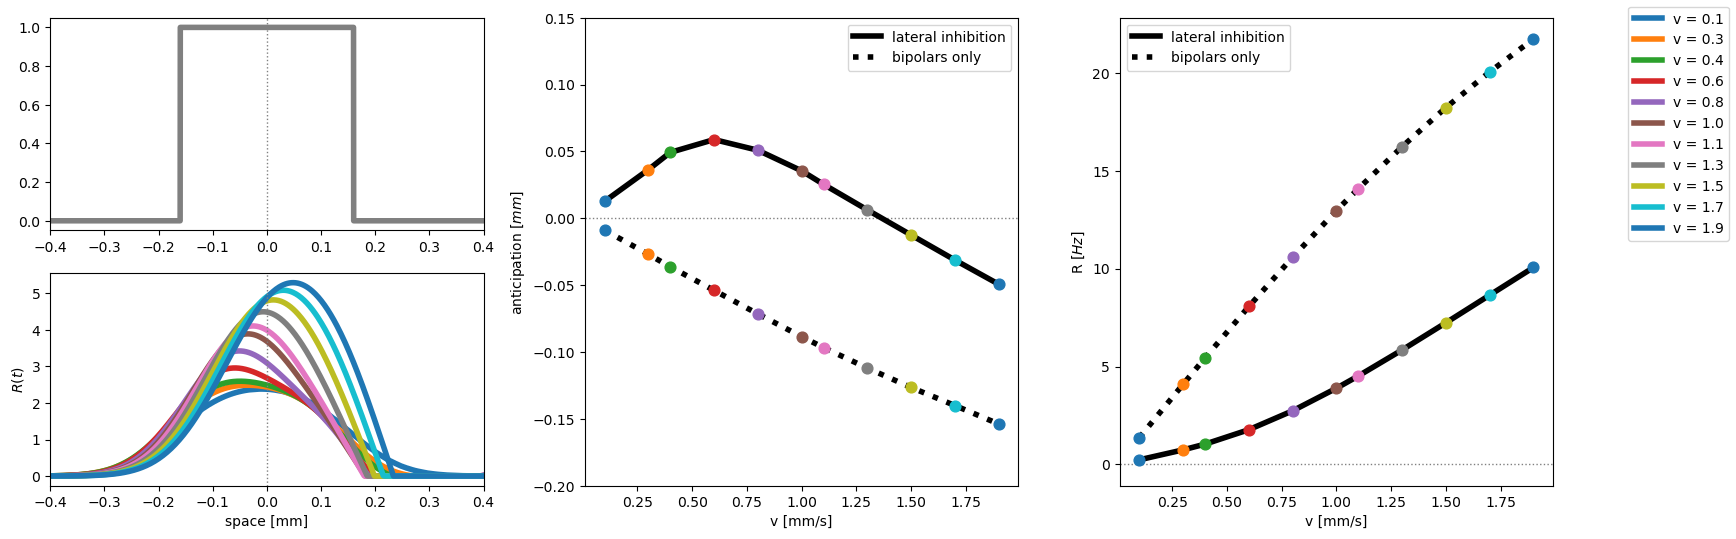

In [17]:
#initialize figure
nrows = 2
ncols = 6

fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')



fig.subplots_adjust(top=0.975,
bottom=0.195,
left=0.065,
right=0.9,
hspace=0.2,
wspace=0.61)



gs = fig.add_gridspec(nrows,ncols)


ax = fig.add_subplot(gs[0,0:2])

    #add panel labels

    #remove frames that are not needed


x = 0

ti = data['times'][x]
barr = [bar(t,pos_cell, v = speeds[x]) for t in ti]
ax.plot(ti*speeds[x]  - pos_cell ,barr, linewidth = lw, color = cbar)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')


ax = fig.add_subplot(gs[1,0:2], sharex = ax)
for x,si in enumerate(speeds[:]):
    ti = data['times'][x]*si
    RG = data[net]['RG'][x]
    ax.plot(ti  - pos_cell, RG, label = f'v = {si}', linewidth = lw)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_xlabel('space [mm]')
ax.set_ylabel('$R(t)$')
ax.set_xlim(-0.4,0.4)
fig.legend()



ax = fig.add_subplot(gs[:,2:4])

ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis = data[net]['ants']['RG_bar'] * speeds
antis_pool = data[net_pool]['ants']['RG_bar'] * speeds


ax.plot(speeds,antis, color = 'k', linewidth = lw, label = 'lateral inhibition')
ax.plot(speeds,antis_pool, color = 'k', linewidth = lw,linestyle = ':', label = 'bipolars only')
for x,si in enumerate(speeds[:]):
    p = ax.scatter(speeds[x],antis[x], s= ms, zorder = 10)
    ax.scatter(speeds[x],antis_pool[x], alpha = 1, color = p.get_facecolors(), s = ms, zorder = 10)
ax.legend()


#col = p.get_facecolors()[idx].tolist()
ax.set_ylim(-.2,.15)
#ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel('anticipation [$mm$]')



ax = fig.add_subplot(gs[:,4:])

ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis = data[net]['amps']['RG'] * speeds
antis_pool = data[net_pool]['amps']['RG'] * speeds


ax.plot(speeds,antis, color = 'k', linewidth = lw, label = 'lateral inhibition')
ax.plot(speeds,antis_pool, color = 'k', linewidth = lw,linestyle = ':', label = 'bipolars only')
for x,si in enumerate(speeds[:]):
    p = ax.scatter(speeds[x],antis[x], s= ms, zorder = 10)
    ax.scatter(speeds[x],antis_pool[x], alpha = 1, color = p.get_facecolors(), s = ms, zorder = 10)
ax.legend()


#col = p.get_facecolors()[idx].tolist()
# ax.set_ylim(-.2,.15)
#ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel('R [$Hz$]')



# speed scaling bipolar

Text(0, 0.5, 'R [$Hz$]')

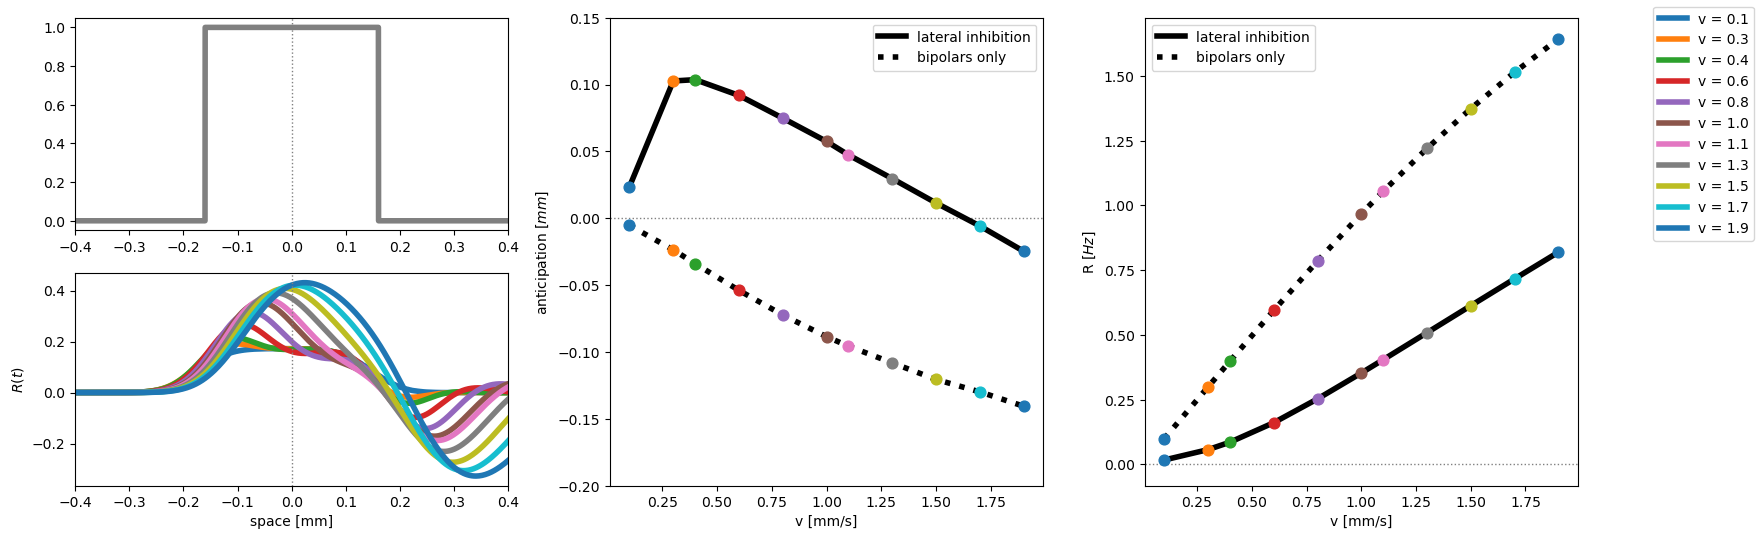

In [20]:
#initialize figure
nrows = 2
ncols = 6

fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')


fig.subplots_adjust(top=0.975,
bottom=0.195,
left=0.065,
right=0.9,
hspace=0.2,
wspace=0.61)



gs = fig.add_gridspec(nrows,ncols)


ax = fig.add_subplot(gs[0,0:2])

    #add panel labels

    #remove frames that are not needed


x = 0

ti = data['times'][x]
barr = [bar(t,pos_cell, v = speeds[x]) for t in ti]
ax.plot(ti*speeds[x]  - pos_cell ,barr, linewidth = lw, color = cbar)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')


ax = fig.add_subplot(gs[1,0:2], sharex = ax)
for x,si in enumerate(speeds[:]):
    ti = data['times'][x]*si
    RG = data[net]['RB'][x]
    ax.plot(ti  - pos_cell, RG, label = f'v = {si}', linewidth = lw)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_xlabel('space [mm]')
ax.set_ylabel('$R(t)$')
ax.set_xlim(-0.4,0.4)
fig.legend()
ax = fig.add_subplot(gs[:,2:4])

ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis = data[net]['ants']['RB_bar'] * speeds
antis_pool = data[net_pool]['ants']['RB_bar'] * speeds


ax.plot(speeds,antis, color = 'k', linewidth = lw, label = 'lateral inhibition')
ax.plot(speeds,antis_pool, color = 'k', linewidth = lw,linestyle = ':', label = 'bipolars only')
for x,si in enumerate(speeds[:]):
    p = ax.scatter(speeds[x],antis[x], s= ms, zorder = 10)
    ax.scatter(speeds[x],antis_pool[x], alpha = 1, color = p.get_facecolors(), s = ms, zorder = 10)
ax.legend()


#col = p.get_facecolors()[idx].tolist()
ax.set_ylim(-.2,.15)
#ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel('anticipation [$mm$]')





ax = fig.add_subplot(gs[:,4:])

ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis = data[net]['amps']['RB'] * speeds
antis_pool = data[net_pool]['amps']['RB'] * speeds


ax.plot(speeds,antis, color = 'k', linewidth = lw, label = 'lateral inhibition')
ax.plot(speeds,antis_pool, color = 'k', linewidth = lw,linestyle = ':', label = 'bipolars only')
for x,si in enumerate(speeds[:]):
    p = ax.scatter(speeds[x],antis[x], s= ms, zorder = 10)
    ax.scatter(speeds[x],antis_pool[x], alpha = 1, color = p.get_facecolors(), s = ms, zorder = 10)
ax.legend()


#col = p.get_facecolors()[idx].tolist()
# ax.set_ylim(-.2,.15)
#ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel('R [$Hz$]')
